# K-Nearest Neighbors

참고 : 파이썬 라이브러리를 활용한 머신러닝

> 가장 가까운 훈련 데이터 포인트 하나를 최근접 이웃으로 찾아 예측에 사용한다. <br>
##### 장점 : 
> 이해하기 매우 쉬운 모델이다. <br>
> 더 복잡한 알고리즘을 적용해보기 전에 시도해볼 수 있다. <br>
##### 단점
> 모델을 빨리 만들 수 있지만, 훈련셋이 매우 크면 예측이 느리다. <br>
> 많은 특성을 가진 데이터셋에는 잘 작동하지 않는다. <br>
> 특성 값 대부분이 0인 데이터셋에는 잘 작동하지 않는다.

### parameter
* n_neighbors : 가장 가까운 이웃의 수(k)

In [1]:
import matplotlib.pyplot as plt

##### 그래프 한글 설정

In [2]:
from matplotlib import font_manager, rc
font_loc = "C:/Windows/Fonts/malgunbd.ttf"
font_name = font_manager.FontProperties(fname=font_loc).get_name()
rc('font', family=font_name)

##### 라이브러리 불러오기

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

##### 데이터 불러오기

In [4]:
cancer = load_breast_cancer()

In [5]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [6]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

##### 데이터 나누기

In [7]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   stratify=cancer.target, random_state=1)

##### 모델 훈련

In [8]:
train_acc = []
test_acc = []

for k in  range(1,11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    train_acc.append(knn.score(X_train,y_train))
    test_acc.append(knn.score(X_test,y_test))

##### 모델 평가

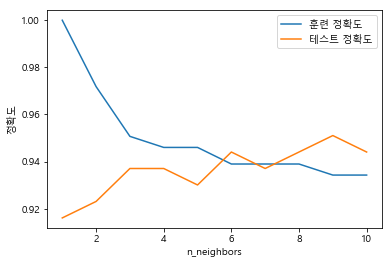

In [9]:
plt.plot(range(1,11), train_acc, label='훈련 정확도')
plt.plot(range(1,11), test_acc, label='테스트 정확도')
plt.ylabel('정확도')
plt.xlabel('n_neighbors')
plt.legend()

##### 목표 변수 예측

In [10]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

##### 결과 분석

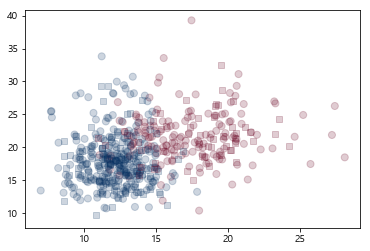

In [11]:
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, s=50, alpha=.2, cmap='RdBu')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, alpha=.2, cmap='RdBu', marker=',')

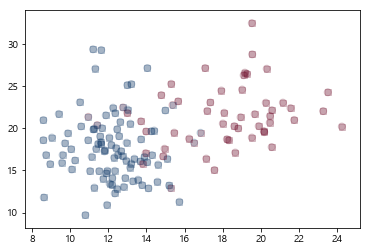

In [12]:
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, s=50, alpha=.2, cmap='RdBu')
plt.scatter(X_test[:,0], X_test[:,1], c=pred, alpha=.2, cmap='RdBu', marker=',')